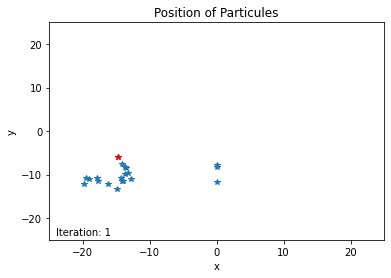

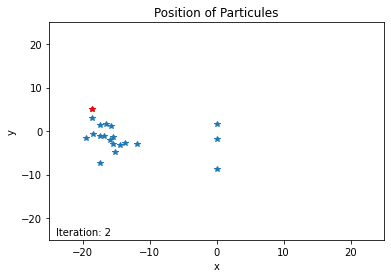

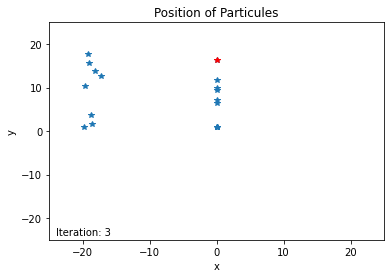

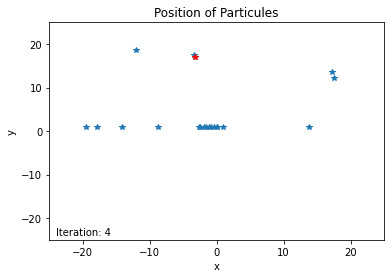

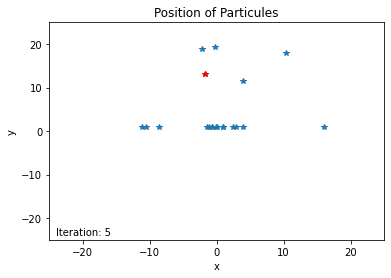

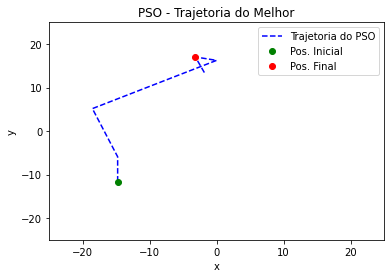

In [3]:
# encoding: utf8

#------------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Simple Particle Swarm Optimization (PSO) with Python
#   July, 2016
#   https://nathanrooy.github.io/posts/2016-08-17/simple-particle-swarm-optimization-with-python/
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
# def F1(x):
#     return x[0]**2 + x[1]**2

# def F2(x):
#     return (-3 * x[1]) / (x[0]**2 + x[1]**2 + 200)#np.exp((x[0] - x[1]) / 30) * np.sin(x[0] * 0.15) * np.cos(x[1] * 0.15)

# def F10(x):
#     return 20 + np.sum(x.T**2 - 10*np.cos(2 * math.pi * x.T)).T

# def F11(x):
#     return 1 + np.sum(abs(x.T)**2 / 4000).T - np.prod(np.cos(x.T)).T

# def F12(x):
#     return 0.5+(np.sin(np.sqrt(x[0]**2 + x[1]**2)**2) - 0.5) / (1 + 0.1 * (x[0]**2 + x[1]**2))

# def F15(x):
#     return -np.exp(0.2*np.sqrt((x[0] - 1)**2 + (x[1] - 1)**2) + (np.cos(2 * x[0]) + np.sin(2 * x[0])))

# def F16(x):
#     return x[0] * np.sin(np.sqrt(np.absolute(x[0]-(x[1]+9))))- (x[1]+9) * np.sin(np.sqrt(np.absolute(x[1]+0.5*x[0]+9)))

# def F17(x):
#     return x[0]**2 + x[1]**2



#--- MAIN ---------------------------------------------------------------------+

def cost_function(x, func):
    if (func == 1):
        return x[:,0]**2 + x[:,1]**2
    elif (func == 2):
        return (-3 * x[:,1]) / (x[:,0]**2 + x[:,1]**2 + 200)

def find_matlab(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]

func_cost = 2
popsize = 20
npar = 2
maxit = 5
c1 = 1
c2 = 4 - c1
C = 1

varhi = 20 # Limite superior das variaveis
varlo = -20 # Limite inferior das variaveis

#par = np.random.rand(popsize, npar)
par = (-10 - (-15)) * np.random.rand(popsize, npar) + (-15)
vel = np.random.rand(popsize, npar)

cost = cost_function(par, func_cost)

minc = np.zeros(maxit + 1)
meanc = np.zeros(maxit + 1)
globalmin = np.zeros(maxit + 1)

minc[0] = np.min(cost)
meanc[0] = np.mean(cost)

globalmin[0] = minc[0]

localpar = par
localcost = cost
globalcost = min(cost)
pos = cost.tolist().index(globalcost)
globalpar = par[pos,:]

the_best_pso = np.zeros((maxit + 1, npar))
the_best_pso[0] = globalpar

# Start iterations
it = 0
plt.ion()
while it < maxit:
    w = (maxit - it) / maxit

    r1 = np.random.rand(popsize, npar)
    r2 = np.random.rand(popsize, npar)
    vel = C * (w * vel + c1 * r1 * (localpar - par) + c2 * r2 * (np.ones((popsize,1)) * globalpar - par))

    par += vel
    overlimit = par <= varhi
    underlimit = par >= varlo
    par = par * overlimit + np.logical_not(overlimit)
    par= par * underlimit

    cost = cost_function(par, func_cost)
    bettercost = cost < localcost
    localcost = localcost * np.logical_not(bettercost) + cost * bettercost
    idx = find_matlab(bettercost.tolist(), lambda x: x > 0)
    localpar[idx,:] = par[idx,:]
    
    temp = min(cost)
    t = cost.tolist().index(temp)
    
    if temp < globalcost:
        globalpar = par[t,:]
        indx = t
        globalcost = temp
    
    it += 1
    minc[it] = np.min(cost)
    globalmin[it] = globalcost
    meanc[it] = np.mean(cost)

    # Exibindo a nova posição das partículas
    plt.cla()
    plt.clf()
    the_best_pso[it] = par[t,:]
    plt.plot(par[:,0], par[:,1], '*', the_best_pso[it,0], the_best_pso[it,1], 'r*')
    plt.axis([varlo - 5, varhi + 5, varlo - 5, varhi + 5])
    plt.title('Position of Particules')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.text(varlo - (abs(varlo) * 0.2), varlo - (abs(varlo) * 0.2), 'Iteration: ' + str(it))
    if (it == maxit):
        plt.ioff()
        plt.show()
    else:
        plt.pause(0.1)


plt.figure(3)
plt_the_best, = plt.plot(the_best_pso[:,0], the_best_pso[:,1], 'b--', label="the_best")
pos_inicial, = plt.plot(the_best_pso[0,0], the_best_pso[0,1], 'go', label="pos_inicial")
pos_final, = plt.plot(the_best_pso[it - 1,0], the_best_pso[it - 1,1], 'ro', label="pos_final")
plt.legend([plt_the_best, pos_inicial, pos_final], ['Trajetoria do PSO', 'Pos. Inicial', 'Pos. Final'])
plt.axis([varlo - 5, varhi + 5, varlo - 5, varhi + 5])
plt.title('PSO - Trajetoria do Melhor')
plt.xlabel('x')
plt.ylabel('y')
plt.show()